In [12]:
%run cone1.py

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 15
})

In [3]:
from matplotlib import cm

color = cm.get_cmap("RdPu")
oiii_corrs = np.loadtxt("corr")
oiii_corrs_x = np.loadtxt("corr_x_")
corr_min = np.min(oiii_corrs)

In [7]:
corr_min

-0.19618814710905794

In [211]:
tmp = []

for i in range(100):
    data = gen_data_frac(0.5, 0.136, 0.1)

    res = opt.minimize(
        lambda s: target(data, *s), 
        [_a_std, _b_std],
        bounds=opt.Bounds(
            [0, 0],
            [np.inf, np.inf]
        )
    )

    s_a, s_b = res.x
    a, b, angle, sed = data
    c = np.corrcoef(s_a * a + sed + np.log10(angle), s_b * b + sed + np.log10(1-angle))[0, 1]

    # if np.abs(c - corr_min) < 1e-4:
    #     break
    tmp.append(c)

np.mean(tmp)

-0.19646072300812495

In [227]:
while True:
    data = gen_data_frac(0.5, 0.19, 0.3)

    res = opt.minimize(
        lambda s: target(data, *s), 
        [_a_std, _b_std],
        bounds=opt.Bounds(
            [0, 0],
            [np.inf, np.inf]
        )
    )

    s_a, s_b = res.x
    a, b, angle, sed = data
    c = np.corrcoef(s_a * a + sed + np.log10(angle), s_b * b + sed + np.log10(1-angle))[0, 1]

    if np.abs(c - corr_min) < 1e-4:
        break

In [229]:
0.5 * _b_std ** 2 / _a_std ** 2

0.3576430706870783

In [228]:
s_b ** 2 / _b_std ** 2, s_a ** 2 / _a_std ** 2

(0.0, 0.26824725503830626)

In [218]:
@np.vectorize
def frac2corrfrac(polar_frac):
    a_ = s_a * a + sed + np.log10(angle)
    b_torus = s_b * b + np.log10(1 - polar_frac) + sed + np.log10(1 - angle)
    b_polar = s_b * b + np.log10(polar_frac) + sed + np.log10(angle)
    b_ = np.log10(10 ** b_torus + 10 ** b_polar)
    frac = 10**np.mean(b_polar - b_)
    return [np.corrcoef(a_, b_)[0, 1], frac]


@np.vectorize
def frac2corrfrac_(polar_frac):
    a_ = s_a * a + sed + np.log10(angle)
    b_torus = s_b * b + np.log10(1 - polar_frac) + sed + np.log10(1 - angle)
    b_polar = s_a * a + np.log10(polar_frac) + sed + np.log10(angle)
    b_ = np.log10(10 ** b_torus + 10 ** b_polar)
    frac = 10**np.mean(b_polar - b_)
    return [np.corrcoef(a_, b_)[0, 1], frac]


@np.vectorize
def frac2corrfrac__(polar_frac):
    a_ = s_a * a + sed + np.log10(angle)
    b_torus = s_b * b + np.log10(1 - polar_frac) + sed + np.log10(1 - angle)
    b_polar = s_a * a * np.sqrt(0.5) + np.log10(polar_frac) + sed + np.log10(angle)
    b_ = np.log10(10 ** b_torus + 10 ** b_polar)
    frac = 10**np.mean(b_polar - b_)
    return [np.corrcoef(a_, b_)[0, 1], frac]


@np.vectorize
def frac2corrfrac___(polar_frac):
    a_ = s_a * a + sed + np.log10(angle)
    b_torus = s_b * b + np.log10(1 - polar_frac) + sed + np.log10(1 - angle)
    b_polar = s_a * a * np.sqrt(0.1) + np.log10(polar_frac) + sed + np.log10(angle)
    b_ = np.log10(10 ** b_torus + 10 ** b_polar)
    frac = 10**np.mean(b_polar - b_)
    return [np.corrcoef(a_, b_)[0, 1], frac]

In [219]:
from scipy.interpolate import CubicSpline

f = np.linspace(0,1)
res = np.array([frac2corrfrac(f) for f in f])
frac = res[:,1]
corr = res[:,0]
frac2corr0 = CubicSpline(frac, corr)

res = np.array([frac2corrfrac_(f) for f in f])
frac_ = res[:,1]
corr_ = res[:,0]
frac2corr0_ = CubicSpline(frac_, corr_)

res = np.array([frac2corrfrac__(f) for f in f])
frac__ = res[:,1]
corr__ = res[:,0]
frac2corr0__ = CubicSpline(frac__, corr__)

res = np.array([frac2corrfrac___(f) for f in f])
frac___ = res[:,1]
corr___ = res[:,0]
frac2corr0___ = CubicSpline(frac___, corr___)

<ipython-input-218-453bb9bad934>:5: RuntimeWarning: divide by zero encountered in log10
  b_polar = s_b * b + np.log10(polar_frac) + sed + np.log10(angle)
<ipython-input-218-453bb9bad934>:4: RuntimeWarning: divide by zero encountered in log10
  b_torus = s_b * b + np.log10(1 - polar_frac) + sed + np.log10(1 - angle)
<ipython-input-218-453bb9bad934>:15: RuntimeWarning: divide by zero encountered in log10
  b_polar = s_a * a + np.log10(polar_frac) + sed + np.log10(angle)
<ipython-input-218-453bb9bad934>:14: RuntimeWarning: divide by zero encountered in log10
  b_torus = s_b * b + np.log10(1 - polar_frac) + sed + np.log10(1 - angle)
<ipython-input-218-453bb9bad934>:25: RuntimeWarning: divide by zero encountered in log10
  b_polar = s_a * a * np.sqrt(0.5) + np.log10(polar_frac) + sed + np.log10(angle)
<ipython-input-218-453bb9bad934>:24: RuntimeWarning: divide by zero encountered in log10
  b_torus = s_b * b + np.log10(1 - polar_frac) + sed + np.log10(1 - angle)
<ipython-input-218-453bb9ba

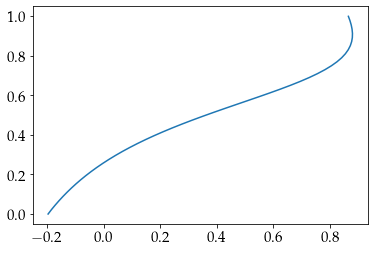

In [207]:
plt.plot(corr___, frac___)

In [220]:
corr2frac0 = CubicSpline(corr, frac)
frac0 = corr2frac0(oiii_corrs)

corr2frac0_ = CubicSpline(corr_, frac_)
frac0_ = corr2frac0_(oiii_corrs)

corr2frac0__ = CubicSpline(corr__[:-2], frac__[:-2])
frac0__ = corr2frac0__(oiii_corrs)

corr2frac0___ = CubicSpline(corr___[:-4], frac___[:-4])
frac0___ = corr2frac0___(oiii_corrs)
# frac0_up = corr2frac0(oiii_corrs + cors_std)
# frac0_low = corr2frac0(oiii_corrs - cors_std)

In [221]:
frac_ = np.loadtxt("frac0")
frac4 = np.loadtxt("0.4")
frac5 = np.loadtxt("0.5")

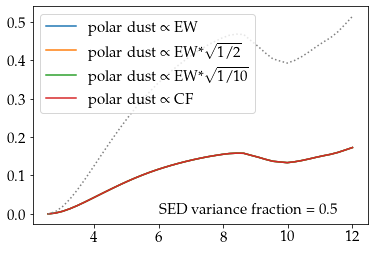

In [222]:
plt.plot(np.linspace(1, 12)[7:], frac0_[7:], label="polar dust $\propto$ EW")
plt.plot(np.linspace(1, 12)[7:], frac0__[7:], label="polar dust $\propto$ EW*$\sqrt{1/2}$")
plt.plot(np.linspace(1, 12)[7:], frac0___[7:], label="polar dust $\propto$ EW*$\sqrt{1/10}$")
plt.plot(np.linspace(1, 12)[7:], frac0[7:], label="polar dust $\propto$ CF")

plt.plot(np.linspace(1, 12)[7:], frac_[7:], color="tab:gray", linestyle="dotted")

plt.text(6, 0, "SED variance fraction = 0.5")

plt.legend(loc="upper left")


plt.savefig('/Users/wul/Desktop/0.5.pdf', bbox_inches="tight")

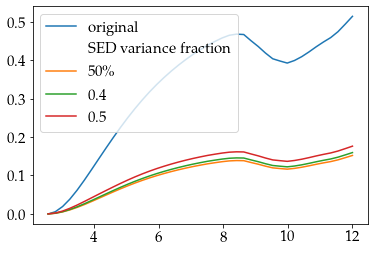

In [79]:
plt.plot(np.linspace(1, 12)[7:], frac_[7:], label="original")
plt.plot([], [], label="SED variance fraction", color="white")
plt.plot(np.linspace(1, 12)[7:], frac0[7:], label="50\%")
plt.plot(np.linspace(1, 12)[7:], frac4[7:], label="0.4")
plt.plot(np.linspace(1, 12)[7:], frac5[7:], label="0.5")
plt.legend()